# Creating the bag of words

In [7]:
import build_vocabulary as bv
import features_extraction as fe

voc = bv.get_vocabulary(path='../dataset/', numWords=6000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt', save=False, stemming=False)

print(voc)

['aaron', 'abandoned', 'abbas', 'abc', 'abducted', 'able', 'aboard', 'abortion', 'about', 'above', 'abroad', 'absolute', 'absolutely', 'abu', 'abuela', 'abuse', 'abused', 'academic', 'academy', 'accept', 'accepts', 'access', 'accessories', 'accident', 'accidentally', 'accidents', 'according', 'account', 'accounts', 'accurate', 'accurately', 'accusations', 'accuse', 'accused', 'accuses', 'achievement', 'aclu', 'acne', 'acquire', 'acquires', 'acquitted', 'across', 'act', 'action', 'activated', 'active', 'activist', 'activists', 'activities', 'activity', 'actor', 'actors', 'actress', 'acts', 'actual', 'actually', 'adam', 'add', 'added', 'addict', 'addicted', 'addiction', 'addicts', 'address', 'addresses', 'adds', 'adele', 'adhd', 'administration', 'admit', 'admits', 'adopt', 'adopted', 'adopts', 'adorable', 'adorably', 'ads', 'adult', 'adults', 'advance', 'advances', 'advantage', 'advent', 'adventure', 'adventures', 'advert', 'advertising', 'advice', 'adviser', 'advocates', 'afc', 'affair

# Training a Naive Bayes classifier

In [8]:
import pvml

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_train, score= pvml.multinomial_naive_bayes_inference(
    X_train, w, b)
accuracy_train=(predictions_train==Y_train).mean()

predictions_validation, score = pvml.multinomial_naive_bayes_inference(
    X_valid, w, b)
accuracy_validation=(predictions_validation==Y_valid).mean()
print('Train accuracy: ',accuracy_train*100)
print('Validation accuracy: ',accuracy_validation*100)

Train accuracy:  97.44583333333333
Validation accuracy:  96.6


# Finding the optimal dimension of the vocabulary

In [9]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
import make_statistics as ms
numWords = []
train_accuracy = []
validation_accuracy = []
false_positive_rates = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.multinomial_naive_bayes_inference(
        X_train, w, b)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    false_positive_rate = ms.calculate_metrics(
        Y_valid, predictions_validation)
    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)
    false_positive_rates.append(false_positive_rate*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy, 'Validation FPR': false_positive_rates})
results.to_csv('../data/naive_diff_voc_size.csv')

<Axes: title={'center': 'Naive Bayes with different vocabulary sizes'}, xlabel='Vocabulary size', ylabel='Percentage (%)'>

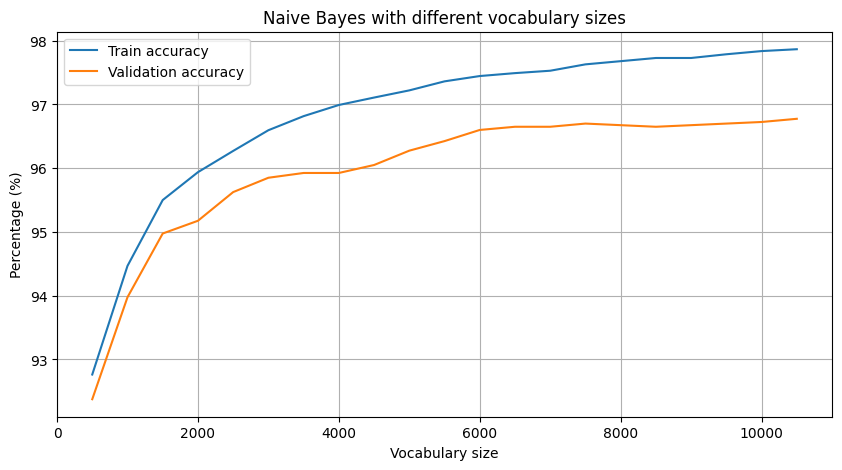

In [10]:
import pandas as pd

data = pd.read_csv('../data/naive_diff_voc_size.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.plot(kind='line', x='Vocabulary size', y=['Train accuracy', 'Validation accuracy', 'Validation FPR'], figsize=(
    10, 5), grid=True, title='Naive Bayes with different vocabulary sizes',ylabel='Percentage (%)')

# Naive bayes without common words 

In [11]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd

words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()


numWords = []
train_accuracy = []
validation_accuracy = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    voc_no_common_words = [word for word in voc if word not in words_to_ignore]

    X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
    X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.multinomial_naive_bayes_inference(
        X_train, w, b)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()

    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy})
results.to_csv('../data/naive_diff_voc_size_no_common_words.csv')

# Naive bayes with stemming

In [12]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
import pandas as pd
numWords = []
train_accuracy = []
validation_accuracy = []
for voc_dim in range(500, 10501, 500):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt', stemming=True)
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)

    predictions_train, score = pvml.multinomial_naive_bayes_inference(
        X_train, w, b)
    accuracy_train = (predictions_train == Y_train).mean()

    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    accuracy_validation = (predictions_validation == Y_valid).mean()
    numWords.append(voc_dim)
    train_accuracy.append(accuracy_train*100)
    validation_accuracy.append(accuracy_validation*100)

results = pd.DataFrame({'Vocabulary size': numWords, 'Train accuracy': train_accuracy,
                       'Validation accuracy': validation_accuracy})
results.to_csv('../data/naive_diff_voc_size_stemming.csv')

<Axes: title={'center': 'Accuracy of different features'}, xlabel='Vocabulary size', ylabel='Accuracy (%)'>

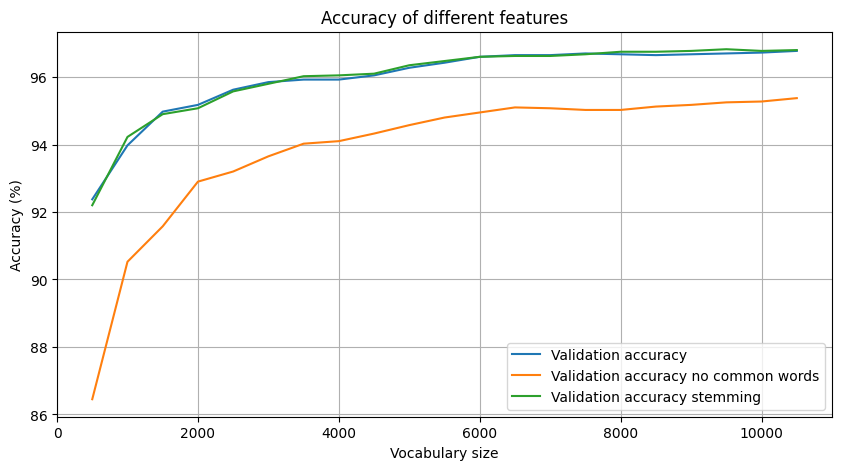

In [13]:
import pandas as pd

data = pd.read_csv('../data/naive_diff_voc_size.csv')
data_no_common = pd.read_csv('../data/naive_diff_voc_size_no_common_words.csv')
data_stemming = pd.read_csv('../data/naive_diff_voc_size_stemming.csv')
comparison = pd.DataFrame({'Vocabulary size': data['Vocabulary size'], 'Validation accuracy': data['Validation accuracy'],
                          'Validation accuracy no common words': data_no_common['Validation accuracy'],
                           'Validation accuracy stemming': data_stemming['Validation accuracy']})


comparison.plot(kind='line', x='Vocabulary size', y=[
                'Validation accuracy', 'Validation accuracy no common words', 'Validation accuracy stemming'], figsize=(10, 5), grid=True,
                title='Accuracy of different features', ylabel='Accuracy (%)')

# Model comparison in terms of AUC

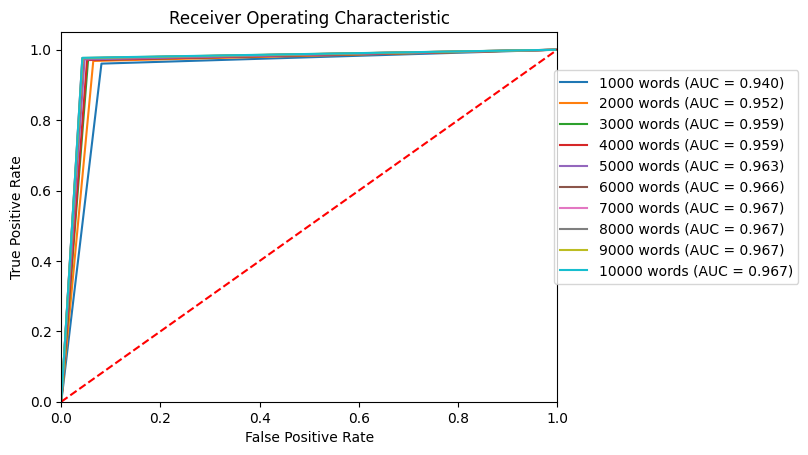

In [14]:
import build_vocabulary as bv
import features_extraction as fe
import pvml
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

for voc_dim in range(1000, 10001, 1000):
    # Get the vocabulary and the BoW representation of the training and validation set
    voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
    X_train, Y_train = fe.get_bow_representation(voc)
    X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                 clickbait_path='../dataset/clickbait_validation.txt')
    # Train the model and get the accuracy on the training and validation set
    w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
    
    predictions_validation, score = pvml.multinomial_naive_bayes_inference(
        X_valid, w, b)
    fpr, tpr, thresholds = roc_curve(Y_valid, predictions_validation)
    auc = roc_auc_score(Y_valid, predictions_validation)
    plt.plot(fpr, tpr,label=str(voc_dim)+' words (AUC = {:.3f})'.format(auc))
    

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 0.3))
plt.show()
   


In [1]:
# classic model with common words and without stemming
import build_vocabulary as bv
import features_extraction as fe
import pvml

voc_dim = 7000
#--------------------------------------------------------------------------------------------
#----------------------MODEL WITHOUT COMMON WORDS AND NO STEMMING----------------------------

# Get the vocabulary and the BoW representation of the training and validation set
voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt')

 # Train the model and get the score
w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_naive, score_naive = pvml.multinomial_naive_bayes_inference(
    X_valid, w, b)

#--------------------------------------------------------------------------------------------
#----------------------MODEL WITHOUT COMMON WORDS AND NO STEMMING----------------------------

words_to_ignore = []
f = open('../data/stopwords.txt', 'r')
n = 0
for w in f.read().split():
    words_to_ignore.append(w)
    n += 1
f.close()

# Get the vocabulary and the BoW representation of the training and validation set
voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
voc_no_common_words = [word for word in voc if word not in words_to_ignore]

X_train, Y_train = fe.get_bow_representation(voc_no_common_words)
X_valid, Y_valid = fe.get_bow_representation(voc_no_common_words, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                             clickbait_path='../dataset/clickbait_validation.txt')
# Train the model and get the accuracy on the training and validation set
w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_no_common_words, score_no_common_words = pvml.multinomial_naive_bayes_inference(
    X_valid, w, b)

#--------------------------------------------------------------------------------------------
#----------------------MODEL WITH COMMON WORDS AND STEMMING----------------------------------

# Get the vocabulary and the BoW representation of the training and validation set
voc = bv.get_vocabulary(path='../dataset/', numWords=voc_dim, save=False)
X_train, Y_train = fe.get_bow_representation(voc, stemming=True)
X_valid, Y_valid = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_validation.txt',
                                                clickbait_path='../dataset/clickbait_validation.txt', stemming=True)
# Train the model and get the accuracy on the training and validation set
w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_stemming, score_stemming = pvml.multinomial_naive_bayes_inference(
    X_valid, w, b)

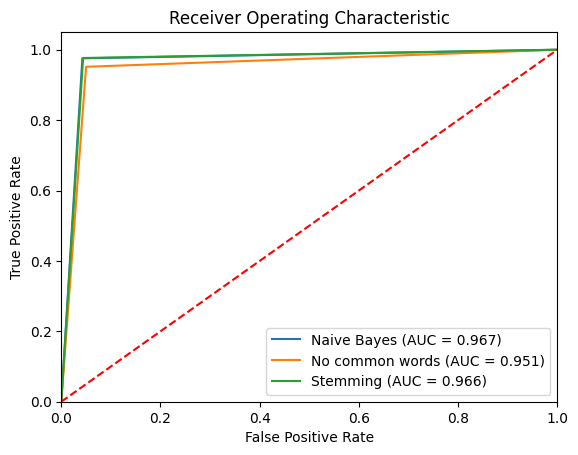

In [2]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

fpr_naive, tpr_naive, thresholds_gnb = roc_curve(Y_valid, predictions_naive)
auc_naive = roc_auc_score(Y_valid, predictions_naive)

fpr_no_common_words, tpr_no_common_words, thresholds_gnb = roc_curve(Y_valid, predictions_no_common_words)
auc_no_common_words = roc_auc_score(Y_valid, predictions_no_common_words)

fpr_stemming, tpr_stemming, thresholds_gnb = roc_curve(Y_valid, predictions_stemming)
auc_stemming = roc_auc_score(Y_valid, predictions_stemming)


plt.plot(fpr_naive, tpr_naive,label='Naive Bayes (AUC = {:.3f})'.format(auc_naive))
plt.plot(fpr_no_common_words, tpr_no_common_words,label='No common words (AUC = {:.3f})'.format(auc_no_common_words))
plt.plot(fpr_stemming, tpr_stemming,label='Stemming (AUC = {:.3f})'.format(auc_stemming))
# Diagonal line representing random classifier
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Analiyzing performance of the best model 
with common words and without stemming
vocabulary size= 4000

Train accuracy:  97.52916666666667
Test accuracy:  96.575
False positive:  4.95


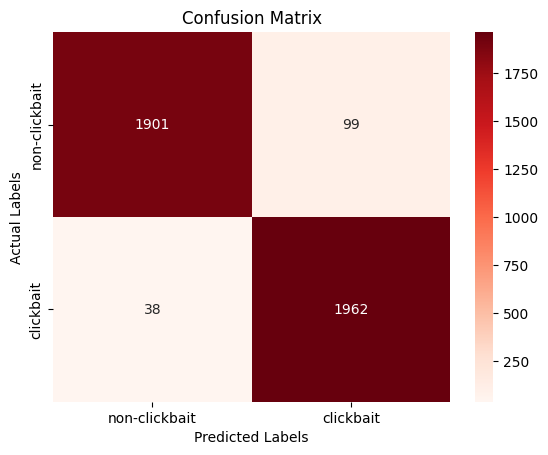

In [1]:
import pvml
import build_vocabulary as bv
import features_extraction as fe
import make_statistics as ms
voc = bv.get_vocabulary(path='../dataset/', numWords=7000, save=False)
X_train, Y_train = fe.get_bow_representation(voc)
X_test, Y_test = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_test.txt',
                                             clickbait_path='../dataset/clickbait_test.txt')

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_train, score= pvml.multinomial_naive_bayes_inference(
    X_train, w, b)
accuracy_train=(predictions_train==Y_train).mean()

predictions_test, score = pvml.multinomial_naive_bayes_inference(
    X_test, w, b)
accuracy_test=(predictions_test==Y_test).mean()
print('Train accuracy: ',accuracy_train*100)
print('Test accuracy: ',accuracy_test*100)
true_positive, true_negative, false_positive, false_negative, false_positive_rate=ms.calculate_metrics(Y_test, predictions_test)
print('False positive: ',false_positive_rate*100)
classes=['non-clickbait','clickbait']
ms.plot_confusion_matrix(Y_test, predictions_test, classes)

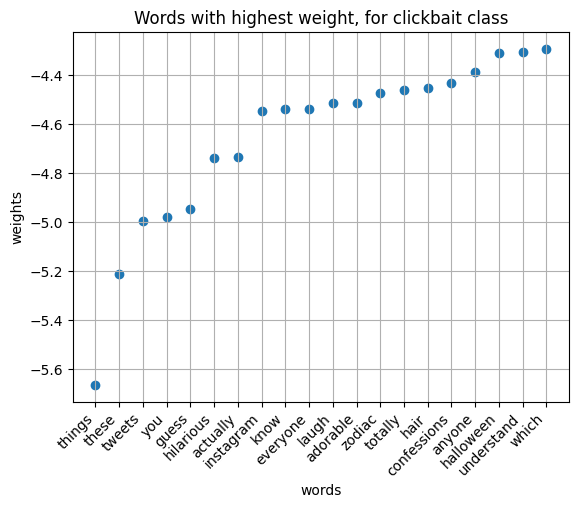

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pvml
import build_vocabulary as bv
import features_extraction as fe

voc = bv.get_vocabulary(path='../dataset/', numWords=7000, save=False)
X_train, Y_train, classes = fe.get_bow_representation(voc, getClasses=True)
X_test, Y_test = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_test.txt',
                                           clickbait_path='../dataset/clickbait_test.txt')

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_train, score = pvml.multinomial_naive_bayes_inference(
    X_train, w, b)
words_weights = pd.DataFrame({'words': voc, 'weights': w[:, 0]})
words_weights['delta'] = w[:, 0]-w[:, 1]
words_weights = words_weights[words_weights['delta'] < 0]
words_weights.sort_values(by='delta', ascending=True, inplace=True)
words = words_weights.head(20)
plt.scatter(x=words['words'], y=words['delta'])
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.title('Words with highest weight, for clickbait class')
plt.xlabel('words')
plt.ylabel('weights')
plt.show()

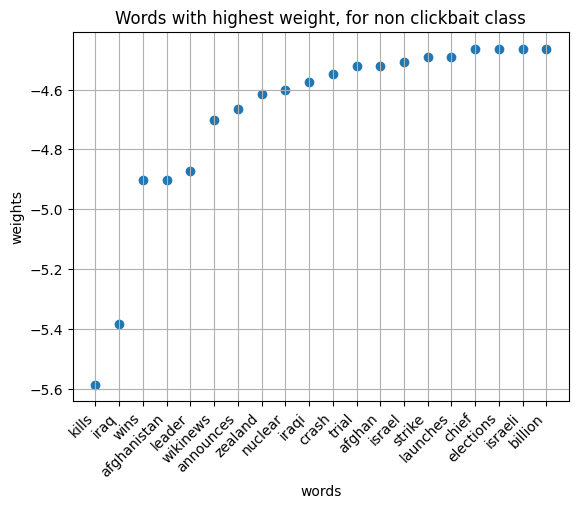

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pvml
import build_vocabulary as bv
import features_extraction as fe

voc = bv.get_vocabulary(path='../dataset/', numWords=7000, save=False)
X_train, Y_train, classes = fe.get_bow_representation(voc, getClasses=True)
X_test, Y_test = fe.get_bow_representation(voc, no_clickbait_path='../dataset/non_clickbait_test.txt',
                                           clickbait_path='../dataset/clickbait_test.txt')

w, b = pvml.multinomial_naive_bayes_train(X_train, Y_train)
predictions_train, score = pvml.multinomial_naive_bayes_inference(
    X_train, w, b)
words_weights = pd.DataFrame({'words': voc, 'weights': w[:, 0]})
words_weights['delta'] = w[:, 1]-w[:, 0]
words_weights = words_weights[words_weights['delta'] < 0]
words_weights.sort_values(by='delta', ascending=True, inplace=True)
words = words_weights.head(20)
plt.scatter(x=words['words'], y=words['delta'])
plt.grid()
plt.xticks(rotation=45, ha='right')
plt.title('Words with highest weight, for non clickbait class')
plt.xlabel('words')
plt.ylabel('weights')
plt.show()